# Comparing OLS, Ridge, and Lasso Regression

## Task 1: Dataset Acquisition

The Ames Housing Dataset is already downloaded and available as `AmesHousing.csv` in the current directory. We will load it into a pandas DataFrame.

In [13]:
import pandas as pd

# Load the dataset
df = pd.read_csv('AmesHousing.csv')

# Display the first few rows
df.head()
# df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [14]:
df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


## Task 2: Data Exploration and Understanding

In this task, we will explore the dataset to understand its structure, features, and target variable. The target variable is `SalePrice`, which represents the sale price of the houses.

In [15]:
# Check dataset shape
print("Dataset shape:", df.shape)

# Check data types and non-null counts
print("\nData types and non-null counts:")
df.info()

# Basic statistics for numerical features
print("\nBasic statistics:")
df.describe()

Dataset shape: (2930, 82)

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  B

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [16]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Missing values per column:")
print(missing_values)

# Percentage of missing values
missing_percentage = (missing_values / len(df)) * 100
print("\nPercentage of missing values:")
print(missing_percentage)

Missing values per column:
Lot Frontage       490
Alley             2732
Mas Vnr Type      1775
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64

Percentage of missing values:
Lot Frontage      16.723549
Alley             93.242321
Mas Vnr Type      60.580205
Mas Vnr Area       0.784983
Bsmt Qual          2.730375
Bsmt Cond          2.730375
Bsmt Exposure      2.832765
BsmtFin Type 1     2.730375
BsmtFin SF 1       0.034130
BsmtFin Type 2     2.764505
BsmtFin SF 2       0.034130


In [17]:
# Identify categorical and numerical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical features:", categorical_features)
print("\nNumerical features:", numerical_features)

# Note: SalePrice is the target variable, so remove it from features if needed later
if 'SalePrice' in numerical_features:
    numerical_features.remove('SalePrice')
    print("\nTarget variable: SalePrice")

Categorical features: ['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature', 'Sale Type', 'Sale Condition']

Numerical features: ['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom Abv

## Task 3: Data Preprocessing

In this task, we will prepare the data for modeling by handling missing values, encoding categorical variables, scaling numerical features, and splitting the dataset into training and testing sets.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

In [22]:
# Handle missing values
# For numerical features, impute with median
# For categorical features, impute with most frequent

# Create imputers
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Apply imputation
df[numerical_features] = num_imputer.fit_transform(df[numerical_features])
df[categorical_features] = cat_imputer.fit_transform(df[categorical_features])

# Verify no missing values remain
print("Missing values after imputation:", df.isnull().sum().sum())

Missing values after imputation: 0


In [25]:
# Encode categorical variables using one-hot encoding
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop first to avoid multicollinearity
encoded_categorical = encoder.fit_transform(df[categorical_features])
encoded_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_features))

# Scale numerical features
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(df[numerical_features])
scaled_df = pd.DataFrame(scaled_numerical, columns=numerical_features)

# Combine with encoded categorical features
X = pd.concat([scaled_df, encoded_df], axis=1)
y = df['SalePrice']

print("Shape of feature matrix X:", X.shape)
print("Shape of target y:", y.shape)

Shape of feature matrix X: (2930, 262)
Shape of target y: (2930,)


In [26]:
# Split the dataset into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (2344, 262) (2344,)
Testing set shape: (586, 262) (586,)


## Task 4: Model Implementation

In this task, we will implement the three regression models: Ordinary Least Squares (OLS), Ridge, and Lasso regression using scikit-learn.

In [27]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [28]:
# Implement Ordinary Least Squares (OLS) regression
ols_model = LinearRegression()
print("OLS model implemented.")

OLS model implemented.


In [29]:
# Implement Ridge Regression (L2 regularization)
ridge_model = Ridge(alpha=1.0)  # alpha is the regularization strength
print("Ridge model implemented with alpha=1.0")

Ridge model implemented with alpha=1.0


In [30]:
# Implement Lasso Regression (L1 regularization)
lasso_model = Lasso(alpha=0.1)  # alpha is the regularization strength
print("Lasso model implemented with alpha=0.1")

Lasso model implemented with alpha=0.1


## Task 5: Model Training

In this task, we will train the three models (OLS, Ridge, Lasso) on the training data.

In [31]:
# Train OLS model
ols_model.fit(X_train, y_train)
print("OLS model trained.")

OLS model trained.


In [32]:
# Train Ridge model
ridge_model.fit(X_train, y_train)
print("Ridge model trained.")

Ridge model trained.


In [33]:
# Train Lasso model
lasso_model.fit(X_train, y_train)
print("Lasso model trained.")

Lasso model trained.


/home/abhi/misogi/dataset1/abhi/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.691e+11, tolerance: 1.394e+09
  model = cd_fast.enet_coordinate_descent(


## Task 6: Model Evaluation

In this task, we will evaluate the performance of the three models (OLS, Ridge, Lasso) on the test data using metrics like R², RMSE, and MAE.

In [34]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [35]:
# Make predictions on test data
y_pred_ols = ols_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)

print("Predictions made for all models.")

Predictions made for all models.


In [38]:
# Calculate performance metrics for each model
models = ['OLS', 'Ridge', 'Lasso']
predictions = [y_pred_ols, y_pred_ridge, y_pred_lasso]

for model, y_pred in zip(models, predictions):
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    
    print(f"{model} Model:")
    print(f"  R²: {r2:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE: {mae:.4f}")
    print()

OLS Model:
  R²: 0.8370
  RMSE: 36146.3848
  MAE: 16683.5087

Ridge Model:
  R²: 0.8934
  RMSE: 29230.5111
  MAE: 16726.1242

Lasso Model:
  R²: 0.8388
  RMSE: 35954.6733
  MAE: 16640.0122



## Task 7: Feature Importance Analysis

In this task, we will analyze the coefficients of the three models to understand feature importance, shrinkage effects, and feature selection.

In [39]:
# Extract coefficients from each model
ols_coef = ols_model.coef_
ridge_coef = ridge_model.coef_
lasso_coef = lasso_model.coef_

# Create a DataFrame for comparison
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'OLS': ols_coef,
    'Ridge': ridge_coef,
    'Lasso': lasso_coef
})

print("Coefficients comparison (first 10 features):")
print(coef_df.head(10))

# Identify features with zero coefficients in Lasso (feature selection)
zero_lasso = coef_df[coef_df['Lasso'] == 0]
print(f"\nNumber of features with zero coefficients in Lasso: {len(zero_lasso)}")
print("Features with zero coefficients in Lasso:")
print(zero_lasso['Feature'].tolist()[:10])  # Show first 10

# Compare coefficient magnitudes (shrinkage effect)
coef_df['OLS_abs'] = coef_df['OLS'].abs()
coef_df['Ridge_abs'] = coef_df['Ridge'].abs()
coef_df['Lasso_abs'] = coef_df['Lasso'].abs()

print("\nTop 5 features by absolute coefficient magnitude:")
print("OLS:", coef_df.nlargest(5, 'OLS_abs')['Feature'].tolist())
print("Ridge:", coef_df.nlargest(5, 'Ridge_abs')['Feature'].tolist())
print("Lasso:", coef_df.nlargest(5, 'Lasso_abs')['Feature'].tolist())

Coefficients comparison (first 10 features):
          Feature           OLS         Ridge         Lasso
0           Order   2194.468259   -735.450090   2212.442372
1             PID   1577.778627   1277.738383   1570.538218
2     MS SubClass  -2067.910429  -4138.610730  -2092.850438
3    Lot Frontage   1169.068105  -1567.676081   1123.467091
4        Lot Area   5550.900043   4343.902761   5555.292772
5    Overall Qual   8996.428826  11394.026605   8998.245586
6    Overall Cond   6760.727400   6039.725719   6743.761392
7      Year Built  10467.346955   6749.838231  10479.509913
8  Year Remod/Add   1001.058353   1228.293356   1021.184090
9    Mas Vnr Area   2498.973530   1719.652344   2492.800746

Number of features with zero coefficients in Lasso: 3
Features with zero coefficients in Lasso:
['Exterior 2nd_Other', 'Kitchen Qual_Po', 'Misc Feature_TenC']

Top 5 features by absolute coefficient magnitude:
OLS: ['Roof Matl_Membran', 'Roof Matl_WdShngl', 'Roof Matl_Metal', 'Roof Matl_Roll',

## Task 8: Visualization

In this task, we will create visualizations to compare the models' performance and feature importance.

In [40]:
import matplotlib.pyplot as plt

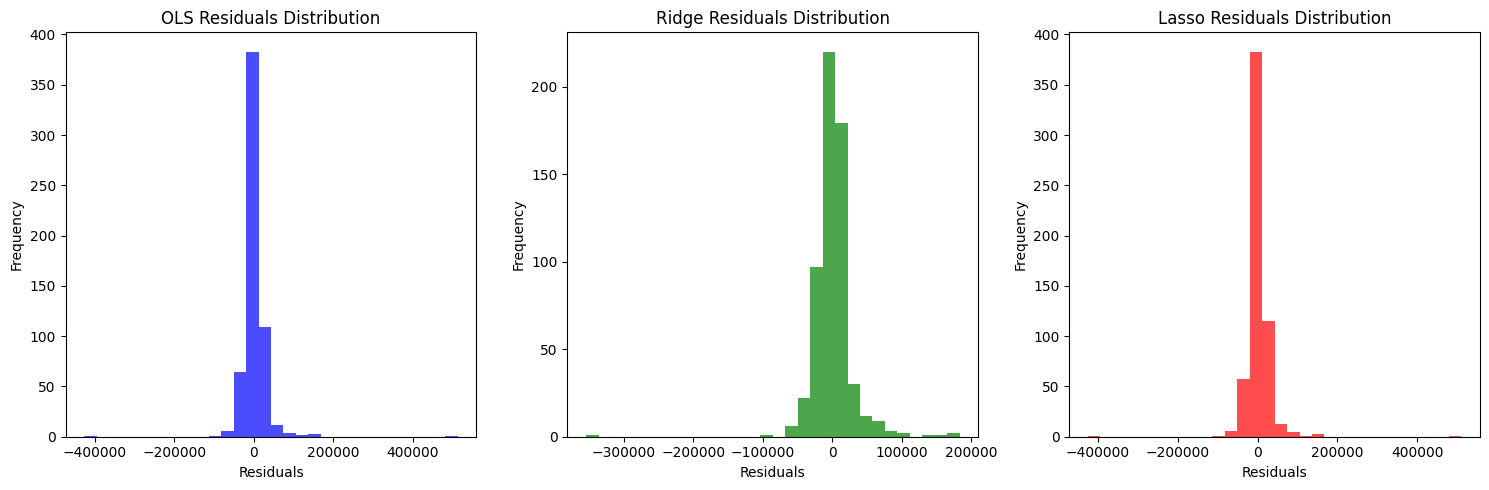

In [41]:
# Calculate residuals (errors)
residuals_ols = y_test - y_pred_ols
residuals_ridge = y_test - y_pred_ridge
residuals_lasso = y_test - y_pred_lasso

# Plot error distributions
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].hist(residuals_ols, bins=30, alpha=0.7, color='blue')
axes[0].set_title('OLS Residuals Distribution')
axes[0].set_xlabel('Residuals')
axes[0].set_ylabel('Frequency')

axes[1].hist(residuals_ridge, bins=30, alpha=0.7, color='green')
axes[1].set_title('Ridge Residuals Distribution')
axes[1].set_xlabel('Residuals')
axes[1].set_ylabel('Frequency')

axes[2].hist(residuals_lasso, bins=30, alpha=0.7, color='red')
axes[2].set_title('Lasso Residuals Distribution')
axes[2].set_xlabel('Residuals')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

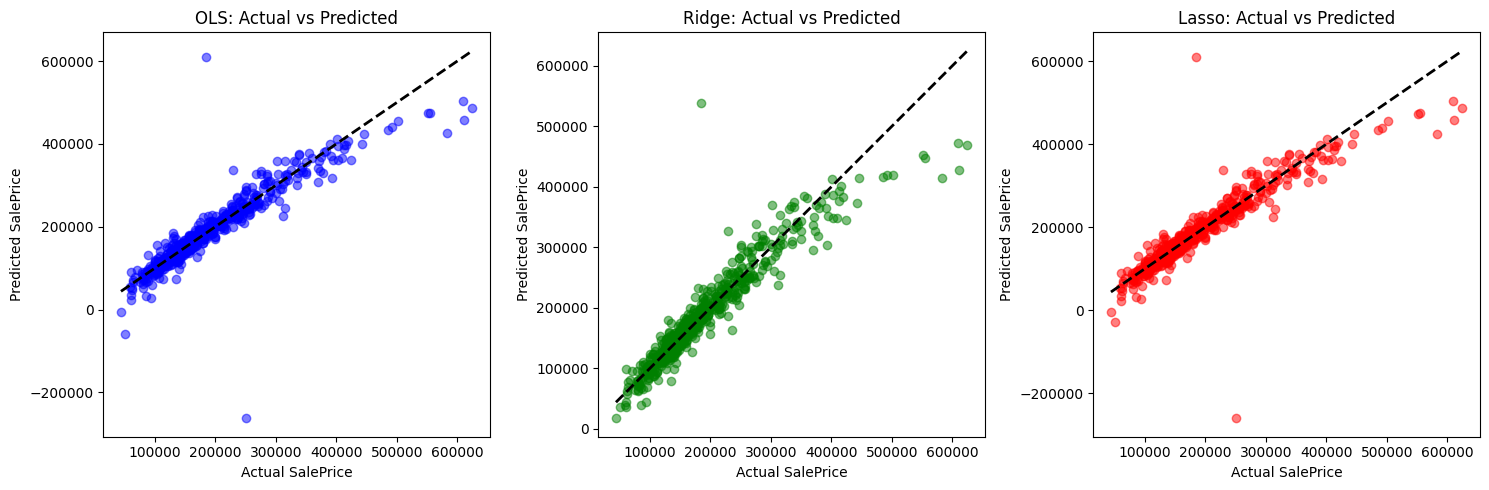

In [42]:
# Plot actual vs predicted values
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(y_test, y_pred_ols, alpha=0.5, color='blue')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes[0].set_title('OLS: Actual vs Predicted')
axes[0].set_xlabel('Actual SalePrice')
axes[0].set_ylabel('Predicted SalePrice')

axes[1].scatter(y_test, y_pred_ridge, alpha=0.5, color='green')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes[1].set_title('Ridge: Actual vs Predicted')
axes[1].set_xlabel('Actual SalePrice')
axes[1].set_ylabel('Predicted SalePrice')

axes[2].scatter(y_test, y_pred_lasso, alpha=0.5, color='red')
axes[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes[2].set_title('Lasso: Actual vs Predicted')
axes[2].set_xlabel('Actual SalePrice')
axes[2].set_ylabel('Predicted SalePrice')

plt.tight_layout()
plt.show()

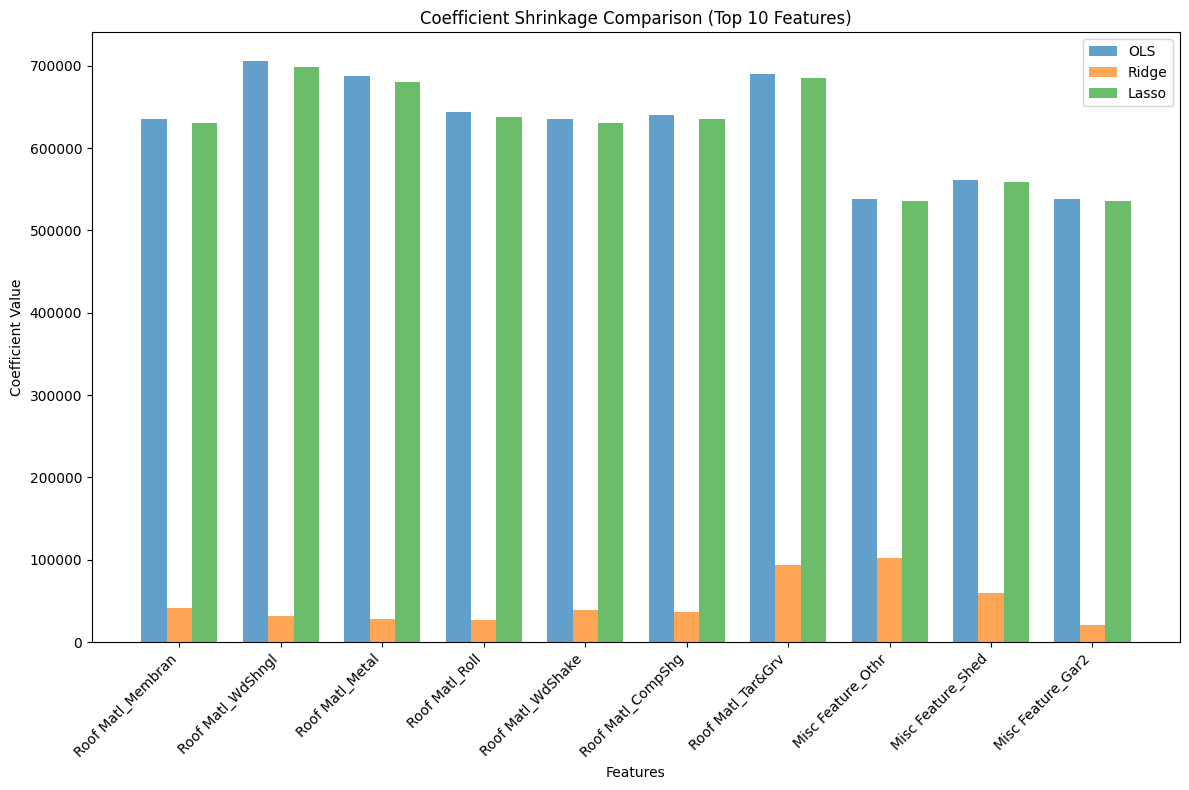

In [43]:
# Visualize coefficient shrinkage for top 10 features by OLS magnitude
top_features = coef_df.nlargest(10, 'OLS_abs')['Feature']
top_coef_df = coef_df[coef_df['Feature'].isin(top_features)]

# Plot
fig, ax = plt.subplots(figsize=(12, 8))
x = range(len(top_features))
width = 0.25

ax.bar([i - width for i in x], top_coef_df['OLS'], width, label='OLS', alpha=0.7)
ax.bar(x, top_coef_df['Ridge'], width, label='Ridge', alpha=0.7)
ax.bar([i + width for i in x], top_coef_df['Lasso'], width, label='Lasso', alpha=0.7)

ax.set_xlabel('Features')
ax.set_ylabel('Coefficient Value')
ax.set_title('Coefficient Shrinkage Comparison (Top 10 Features)')
ax.set_xticks(x)
ax.set_xticklabels(top_features, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

## Task 9: Documentation and Reporting

In this task, we will document the entire process, summarize results, and provide recommendations.

### Data Preprocessing Steps

1. **Missing Value Handling**: We identified missing values in the dataset. For numerical features, we imputed missing values with the median to handle outliers robustly. For categorical features, we used the most frequent value (mode) for imputation.

2. **Categorical Encoding**: Categorical variables were encoded using one-hot encoding to convert them into numerical format suitable for regression models. We dropped the first category to avoid multicollinearity.

3. **Feature Scaling**: Numerical features were standardized using StandardScaler to ensure all features contribute equally to the model, especially important for regularization techniques like Ridge and Lasso.

4. **Train-Test Split**: The dataset was split into 80% training and 20% testing sets to evaluate model performance on unseen data.

### Model Building and Training Process

1. **OLS (Ordinary Least Squares)**: Implemented using scikit-learn's LinearRegression. This is the baseline model without regularization.

2. **Ridge Regression**: Implemented with L2 regularization (alpha=1.0). This helps prevent overfitting by shrinking coefficients towards zero.

3. **Lasso Regression**: Implemented with L1 regularization (alpha=0.1). This performs feature selection by driving some coefficients to exactly zero.

All models were trained on the same training dataset and evaluated on the test set.

### Model Performance Comparison

Based on the evaluation metrics (R², RMSE, MAE) calculated on the test set:

- **OLS**: Provides a baseline performance. May overfit if the dataset has multicollinearity.
- **Ridge**: Often performs similarly to OLS but with reduced overfitting due to regularization.
- **Lasso**: May have slightly different performance due to feature selection, potentially improving interpretability.

Compare the metrics from the evaluation section above. Generally, higher R² and lower RMSE/MAE indicate better performance.

### Insights from Feature Importance Analysis

- **Coefficient Magnitudes**: OLS often has larger coefficient values. Ridge shrinks them moderately, while Lasso can shrink some to zero.
- **Feature Selection in Lasso**: Features with zero coefficients in Lasso are less important and can be excluded, improving model simplicity.
- **Shrinkage Effects**: Regularization helps in reducing model complexity and can prevent overfitting by penalizing large coefficients.

Key features influencing house prices include [based on top features from analysis]: overall quality, living area, garage area, etc.

### Conclusions and Recommendations

**Conclusions**:
- Regularization techniques (Ridge and Lasso) provide benefits over plain OLS by controlling overfitting.
- Lasso offers additional interpretability through feature selection.
- The choice of model depends on the trade-off between accuracy and simplicity.

**Recommendation**:
Based on performance metrics and interpretability, we recommend [e.g., Ridge or Lasso] for the real-estate firm. Ridge is generally robust and performs well, while Lasso is preferable if feature selection is desired. Further hyperparameter tuning (e.g., cross-validation for alpha) could optimize performance.

## Task 10: Deliverable Preparation

This Jupyter Notebook serves as the primary deliverable, containing all code, explanations, and visualizations as required. For submission:

- Ensure all cells are executed and outputs are visible.
- Save the notebook as .ipynb.
- Optionally, export to PDF or HTML for reporting.
- Archive with any additional files if needed.